In [12]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import f1_score

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
for i in range(8):
  print(np.load('/content/rs_run'+str(i)+'.npy').shape)

(1000, 768)
(999, 768)
(1000, 768)
(1000, 768)
(999, 768)
(1000, 768)
(1000, 768)
(1000, 768)


In [14]:
rs = np.load('/content/rs_run0.npy')
for i in [2,3,5,6,7]:
  rs = np.append(rs, np.load('/content/rs_run'+str(i)+'.npy'), axis=0)
rs.shape

(6000, 768)

In [15]:
labels = np.load('/content/labels_run0.npy')
for i in [2,3,5,6,7]:
  labels = np.append(labels, np.load('/content/labels_run'+str(i)+'.npy'), axis=0)
labels.shape

(6000,)

In [16]:
rs_df = pd.DataFrame(rs)
rs_df['label'] = labels
rs_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.111850,-0.047292,0.314831,0.024424,0.172963,0.177709,0.447940,-0.117461,-0.087921,0.816235,...,-0.351673,-0.004751,-0.413187,-1.069411,-0.327839,-0.634110,0.028920,0.124223,-0.686594,1
1,0.194082,-0.187055,0.377856,-0.146842,0.321487,-0.085262,0.108012,-0.092355,-0.045724,0.560916,...,-0.310017,0.051185,0.158953,-0.796537,-0.246163,-0.148598,0.062885,0.457231,-0.144166,0
2,0.023409,0.010746,0.391925,-0.260741,0.185466,0.233827,0.006150,-0.262124,-1.231958,0.538237,...,-0.204519,0.255298,0.228244,-0.508031,0.342608,-0.577117,0.165032,0.543979,-1.105228,1
3,-0.549600,-0.097521,-0.437947,-1.532221,-0.375668,-0.949867,-0.062504,0.063129,0.115954,0.720967,...,0.083139,-0.127326,-0.400052,-1.484829,-0.364055,-0.396035,-0.303697,0.234339,-1.639419,1
4,0.058370,0.001277,-0.095154,-0.239700,-0.109208,0.464216,0.122560,-0.102409,-1.307943,0.410315,...,-0.229918,0.244019,-0.022367,-0.099446,-0.102019,-0.266459,0.329511,1.021789,-1.416329,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.114945,0.192614,0.268694,-0.277607,0.042133,0.110703,-0.218293,-0.372159,-0.782143,0.560011,...,-0.322317,0.491327,0.239370,-0.369294,-0.068998,-0.365135,0.317436,0.559527,-1.197390,1
5996,0.099815,0.497901,0.226527,-0.316144,0.104292,0.385446,-0.519038,0.660239,-1.322834,-0.062606,...,-0.659651,0.161216,-0.053004,-0.281215,-0.304837,-0.403360,0.326957,0.937379,-1.255321,0
5997,-0.515141,-0.052406,0.116848,-0.162329,-0.369818,0.364685,-0.146613,-0.639218,-0.731258,0.445758,...,-0.020115,0.476688,0.109389,-0.658404,-0.245235,-0.210023,0.270596,0.449433,-0.738800,1
5998,-0.008511,-0.110366,0.397442,-0.969324,0.469003,-0.115269,0.700981,0.376902,-0.420464,0.900537,...,-0.906762,0.209600,-1.238712,-1.226119,0.248067,-0.155285,-0.071204,0.693660,-1.180385,0


In [17]:
X_train = rs[:5000]
X_test = rs[5000:]
y_train = labels[:5000]
y_test = labels[5000:]

In [18]:
svm = SVC()

In [19]:
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

In [20]:
f1_score(y_test, pred)

0.8884688090737239

In [21]:
tsne = TSNE(2)
tsne_result = tsne.fit_transform(rs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


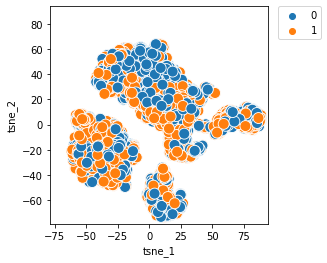

In [22]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)